In [1]:
#Exercise 1: Concatenate
import pandas as pd
import numpy as np

df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 1], ['d', 2]],
                   columns=['letter', 'number'])

df_concat = pd.concat([df1, df2], axis=0, ignore_index=True)
df_concat.head()




,letter,number
0,a,1
1,b,2
2,c,1
3,d,2


In [5]:
#Exercise 2: Merge
#question 1
import pandas as pd

# Creating the DataFrames
df1_dict = {
    'id': ['1', '2', '3', '4', '5'],
    'Feature1': ['A', 'C', 'E', 'G', 'I'],
    'Feature2': ['B', 'D', 'F', 'H', 'J']
}

df1 = pd.DataFrame(df1_dict, columns=['id', 'Feature1', 'Feature2'])

df2_dict = {
    'id': ['1', '2', '6', '7', '8'],
    'Feature1': ['K', 'M', 'O', 'Q', 'S'],
    'Feature2': ['L', 'N', 'P', 'R', 'T']
}

df2 = pd.DataFrame(df2_dict, columns=['id', 'Feature1', 'Feature2'])

# Merging the DataFrames on the 'id' column with an inner join
result = pd.merge(df1, df2, on='id', how='inner', suffixes=('_x', '_y'))
print(result)


  id Feature1_x Feature2_x Feature1_y Feature2_y
0  1          A          B          K          L
1  2          C          D          M          N


In [ ]:
#question 2
result_full_outer = pd.merge(df1, df2, on='id', how='outer', suffixes=('_df1', '_df2'))
print(result_full_outer)


  id Feature1_df1 Feature2_df1 Feature1_df2 Feature2_df2
0  1            A            B            K            L
1  2            C            D            M            N
2  3            E            F          NaN          NaN
3  4            G            H          NaN          NaN
4  5            I            J          NaN          NaN
5  6          NaN          NaN            O            P
6  7          NaN          NaN            Q            R
7  8          NaN          NaN            S            T


In [ ]:
#Exercise 3: Merge MultiIndex
#question 1


all_dates = pd.date_range('2021-01-01', '2021-12-15')
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']


index_alt = pd.MultiIndex.from_product([all_dates, tickers], names=['Date', 'Ticker'])
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])


market_data = pd.DataFrame(index=index,
                        data=np.random.randn(len(index), 3),
                        columns=['Open', 'Close', 'Close_Adjusted'])

alternative_data = pd.DataFrame(index=index_alt,
                                data=np.random.randn(len(index_alt), 2),
                                columns=['Twitter', 'Reddit'])


merged_data = market_data.merge(alternative_data, how='left', left_index=True, right_index=True)


merged_data.fillna(0, inplace=True)


merged_data.index = [f"(Timestamp('{row[0]}', freq='B'), '{row[1]}')" for row in merged_data.index]

merged_data.head()
#merged_data.shape


,Open,Close,Close_Adjusted,Twitter,Reddit
"(Timestamp('2021-01-01 00:00:00', freq='B'), 'AAPL')",1.478047,-0.752789,-0.919172,0.906402,-1.422022
"(Timestamp('2021-01-01 00:00:00', freq='B'), 'FB')",-1.146678,-0.170620,-1.027517,0.441170,0.024023
"(Timestamp('2021-01-01 00:00:00', freq='B'), 'GE')",1.081144,-0.152392,-2.321766,0.946175,0.311790
"(Timestamp('2021-01-01 00:00:00', freq='B'), 'AMZN')",-0.023645,-0.134075,-0.778419,0.648273,-0.616423
"(Timestamp('2021-01-01 00:00:00', freq='B'), 'DAI')",-0.574551,0.257819,-0.694407,1.749319,-1.214056


In [ ]:
#question 2
merged_df = market_data.merge(alternative_data, how='left', left_index=True, right_index=True)

filled_df = merged_df.fillna(0)
#print(filled_df.sum().sum() == merged_df.sum().sum())  



True


In [41]:
# Exercise 4: Groupby Apply
# question 1

def winsorize(df, quantiles):
     
    """df: pd.DataFrame
         quantiles: list
         ex: [0.05, 0.95]"""
         

    lower_percentile = df.quantile(quantiles[0])
    upper_percentile = df.quantile(quantiles[1])
    df_winsorized = df.clip(lower=lower_percentile, upper=upper_percentile, axis=1)
    return df_winsorized


df = pd.DataFrame(range(1,11), columns=['sequence'])

print(winsorize(df, [0.20, 0.80]).to_markdown())


|    |   sequence |
|---:|-----------:|
|  0 |        2.8 |
|  1 |        2.8 |
|  2 |        3   |
|  3 |        4   |
|  4 |        5   |
|  5 |        6   |
|  6 |        7   |
|  7 |        8   |
|  8 |        8.2 |
|  9 |        8.2 |


ValueError: No axis named 1 for object type Series

In [39]:


def winsorize_group(df, quantiles):
    """
    df: pd.DataFrame
        DataFrame с данными, который необходимо винзоризировать по группам.
    quantiles: list
        Список с двумя процентилями, например: [0.05, 0.95].
        Значения будут заменяться на эти процентели для каждой группы.
    """
 
    grouped = df.groupby('group')
    
 
    def apply_winsorize(group):
        lower_percentile = group['sequence'].quantile(quantiles[0])
        upper_percentile = group['sequence'].quantile(quantiles[1])
        group['sequence'] = group['sequence'].clip(lower=lower_percentile, upper=upper_percentile)
        return group
    
  
    df_winsorized = grouped.apply(apply_winsorize)
    return df_winsorized

groups = np.concatenate([np.ones(10), np.ones(10)+1,  np.ones(10)+2, np.ones(10)+3, np.ones(10)+4])
df = pd.DataFrame(data=zip(groups, range(1, 51)), columns=["group", "sequence"])

df_winsorized = winsorize_group(df, [0.05, 0.95])


print(df_winsorized.head(11))


          group  sequence
group                    
1.0   0     1.0      1.45
      1     1.0      2.00
      2     1.0      3.00
      3     1.0      4.00
      4     1.0      5.00
      5     1.0      6.00
      6     1.0      7.00
      7     1.0      8.00
      8     1.0      9.00
      9     1.0      9.55
2.0   10    2.0     11.45


C:\Users\Alex Shtanko\AppData\Local\Temp\ipykernel_10332\2172526934.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_winsorized = grouped.apply(apply_winsorize)


In [6]:


data={'value':[20.45,22.89,32.12,111.22,33.22,100,99.9],
      'product':[ 'table', 'chair', 'chair', 'mobile phone', 'table', 'mobile phone', 'table']
}
df=pd.DataFrame(data)

df.loc[df['product']=='table'].min()

df.groupby('product').agg({'value':['min','max','mean']})


value                 
                 min     max     mean
product                              
chair          22.89   32.12   27.505
mobile phone  100.00  111.22  105.610
table          20.45   99.90   51.190

Ticker          AAPL      AMZN       DAI        FB        GE
Date                                                        
2021-01-01 -1.206864 -1.036212  0.052800  0.282159  0.772089
2021-01-04  0.293307 -0.482889 -1.065287 -0.483214  1.719678
2021-01-05 -0.751942  0.022964  2.220676 -0.445926 -0.191641
2021-01-06  0.685620  1.373865  1.521991 -0.435564 -0.011425
2021-01-07  0.742545  2.150741 -1.241098 -0.487039 -0.335595


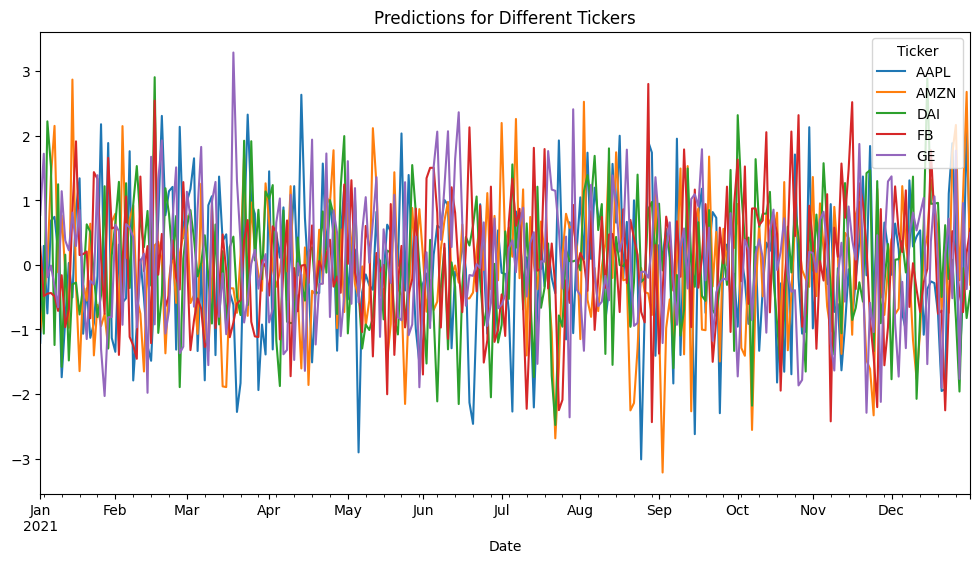

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

business_dates = pd.bdate_range('2021-01-01', '2021-12-31')
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

market_data = pd.DataFrame(index=index,
                           data=np.random.randn(len(index), 1),
                           columns=['Prediction'])

# Разворачиваем MultiIndex (тикеры становятся столбцами)
unstacked_df = market_data.unstack(level='Ticker')

# Убираем MultiIndex в столбцах, оставляя только тикеры
unstacked_df.columns = unstacked_df.columns.droplevel(0)


print(unstacked_df.head())

unstacked_df.plot(figsize=(12, 6), title="Predictions for Different Tickers")
plt.show()

